In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
import torch
from torchvision.datasets.mnist import MNIST
from torch.autograd import Variable
from torch.utils.data import DataLoader

import vae

using devide: cpu


Auto-Encoding Variational Bayes https://arxiv.org/abs/1312.6114
Tutorial on Variational Autoencoders https://arxiv.org/abs/1606.05908
https://towardsdatascience.com/intuitively-understanding-variational-autoencoders-1bfe67eb5daf

In [2]:
mnist_dataset_train = MNIST('./tmp/', train=True, download=True,
                            transform=vae.preprocess)

In [3]:
train_data = DataLoader(mnist_dataset_train, batch_size=16, shuffle=True)

In [4]:
len(mnist_dataset_train)

60000

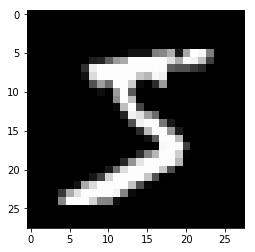

In [5]:
plt.imshow(mnist_dataset_train[0][0].numpy()[0], cmap='gray')

In [6]:
#model = vae.train(20)

In [7]:
#torch.save(model, 'vae_math.pth')
model = torch.load('vae_math.pth') 

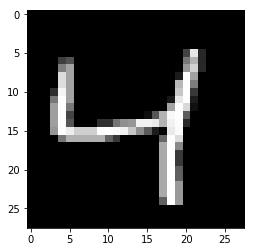

In [8]:
plt.imshow(mnist_dataset_train[2][0].numpy()[0], cmap='gray')

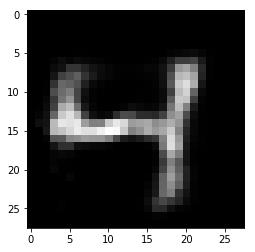

In [9]:
img, _, _ = model(Variable(mnist_dataset_train[2][0]))
img = img.data
plt.imshow(vae.to_img(img)[0], cmap='gray')

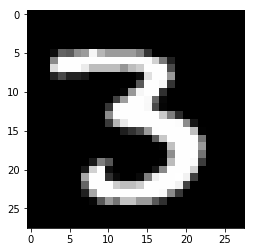

In [10]:
plt.imshow(mnist_dataset_train[12][0].numpy()[0], cmap='gray')

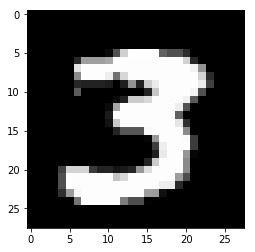

In [11]:
plt.imshow(mnist_dataset_train[27][0].numpy()[0], cmap='gray')

In [12]:
inp0 = Variable(mnist_dataset_train[6][0])
out0 = model.encode(inp0)[0]

inp1 = Variable(mnist_dataset_train[14][0])
out1 = model.encode(inp1)[0]

difference = out0 - out1

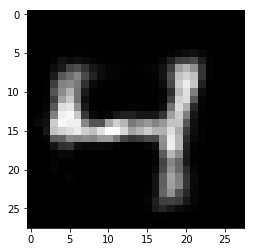

In [32]:
inp2 = Variable(mnist_dataset_train[2][0])
out2 = model.encode(inp2)[0]

plt.imshow(model.decode(out2).data.numpy()[0], cmap='gray')

In [33]:
@interact(x=(-1.0,1.0,0.1))
def h(x=0):
    plt.imshow(model.decode(out2 + x*difference).data.numpy()[0], cmap='gray')

interactive(children=(FloatSlider(value=0.0, description='x', max=1.0, min=-1.0), Output()), _dom_classes=('widget-interact',))

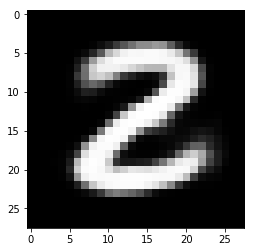

In [37]:
inp2 = Variable(mnist_dataset_train[25][0])
out2 = model.encode(inp2)[0]

plt.imshow(model.decode(out2).data.numpy()[0], cmap='gray')

In [38]:
@interact(x=(-1.0,1.0,0.1))
def h(x=0):
    plt.imshow(model.decode(out2 + x*difference).data.numpy()[0], cmap='gray')

interactive(children=(FloatSlider(value=0.0, description='x', max=1.0, min=-1.0), Output()), _dom_classes=('widget-interact',))

In [36]:
difference.data.numpy()

array([[-0.00285944, -0.38849252,  1.002372  ,  0.5129059 ,  0.01846436,
        -0.47635734, -1.548381  ,  0.01531989, -0.16046417,  0.45133817,
         0.01354975, -1.1635611 , -0.01726449, -0.00320715, -0.3803512 ,
         0.03172918, -0.9216504 ,  0.1965482 , -0.26804835,  0.07370157]],
      dtype=float32)

In [28]:
np.abs(difference.data.numpy()).mean()

0.3823283